In [1]:
# !pip install psycopg2-binary 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://postgres:a@localhost:5432/sqlChallenge')
connection = engine.connect()

In [34]:
# Create a histogram to visualize the most common salary ranges for employees.
# Create a bar chart of average salary by title.
#  build query
table =engine.dialect.identifier_preparer.quote("Salaries")
query = f"SELECT * FROM public.{table}"
#  read the data
df = pd.read_sql(query, connection)
# df.head()

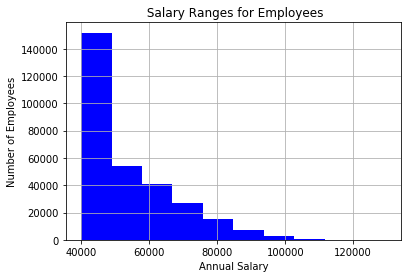

In [35]:
df["salary"].hist(color="blue")
plt.title(" Salary Ranges for Employees")
plt.xlabel("Annual Salary")
plt.ylabel("Number of Employees")
plt.savefig("images/histogram_salaries.png")
plt.show()

In [ ]:
# CREATE VIEW avg_salaries_by_title AS
# SELECT round(avg(s.salary)) as avg_salary, t.title
# FROM public."Titles" t
# JOIN public."Employees" e
# ON t.title_id = e.emp_title_id
# JOIN public."Salaries" s
# ON e.emp_no = s.emp_no
# GROUP BY t.title;

In [36]:
cmd_title_salary = "SELECT * FROM avg_salaries_by_title ORDER BY avg_salary ASC"

In [37]:
salary_df = pd.read_sql(cmd_title_salary, connection)

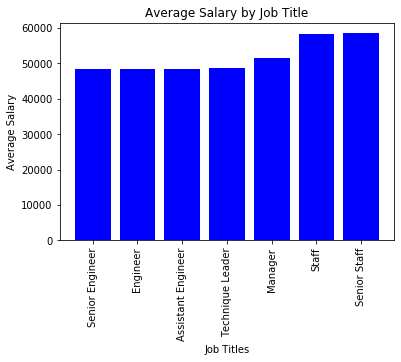

In [41]:
salary_df.head()
titles = salary_df["title"]
avg_salary = salary_df["avg_salary"]

# create bar plot
plt.title("Average Salary by Job Title")
plt.bar(titles, avg_salary, color="blue")
plt.xlabel("Job Titles")
plt.ylabel("Average Salary")
plt.xticks(rotation=90)
plt.savefig("images/avg_salary_titles.png")
plt.show()